In [695]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [197]:
dat = pd.read_csv('C:/Users/Mike/AnacondaProjects/Capstone/Movies/movie_metadata.csv')

In [694]:
# Creates a data template
dat_df = dat[['movie_title', 'genres', 'imdb_score', 'movie_facebook_likes', 'gross', 'budget',
              'num_critic_for_reviews', 'num_user_for_reviews', 'title_year']]
dat_df.columns = ['Movie', 'Genre', 'Imdb', 'Facebook Likes', 'Gross', 'Budget',
                  'Number of Critic Reviews', 'Number of User Reviews', 'Year']

In [688]:
# Find all genre of the movies from the dataset
list_genre = set()
for x in dat_df['Genre'].str.split('|'):
    list_genre = set().union(x, list_genre)
list_genre = list(list_genre)

# Tally the frequency of each genre appearring in the dataset
df_genre = dat_df[['Movie', 'Year']].reset_index(drop = True)
for g in list_genre:
    df_genre[g] = dat_df['Genre'].str.contains(g).apply(lambda x:1 if x else 0)

# Locate the recent movies within the last 10 year
df_genre_10yr = df_genre.loc[lambda x: dat_df['Year'] > 2006, :].reset_index(drop = True)

# Remove Movie and Year column to count the frequency of genre
df_genre = df_genre.drop('Movie', 1)
df_genre = df_genre.drop('Year', 1)

df_genre_10yr = df_genre_10yr.drop('Movie', 1)
df_genre_10yr = df_genre_10yr.drop('Year', 1)

In [689]:
# Count the frequency of each genre for all time
## created a new variable to store the dataframe
genre_freq = df_genre.apply(pd.value_counts).fillna(0)

# Remove first column
genre_freq = genre_freq.drop(genre_freq.index[0])

genre_freq = genre_freq.transpose()
genre_freq.columns = ['Counts']

In [690]:
# Count the frequency of each genre for last 10 years
## created a new variable to store the dataframe
genre_freq_10yr = df_genre_10yr.apply(pd.value_counts).fillna(0)

# Remove first column
genre_freq_10yr = genre_freq_10yr.drop(genre_freq_10yr.index[0])

genre_freq_10yr = genre_freq_10yr.transpose()
genre_freq_10yr.columns = ['Counts']

In [691]:
# Assign variable for bar chart
objects = genre_freq.index
x_pos = np.arange(len(objects))
freq = genre_freq['Counts']
freq_10yr = genre_freq_10yr['Counts']

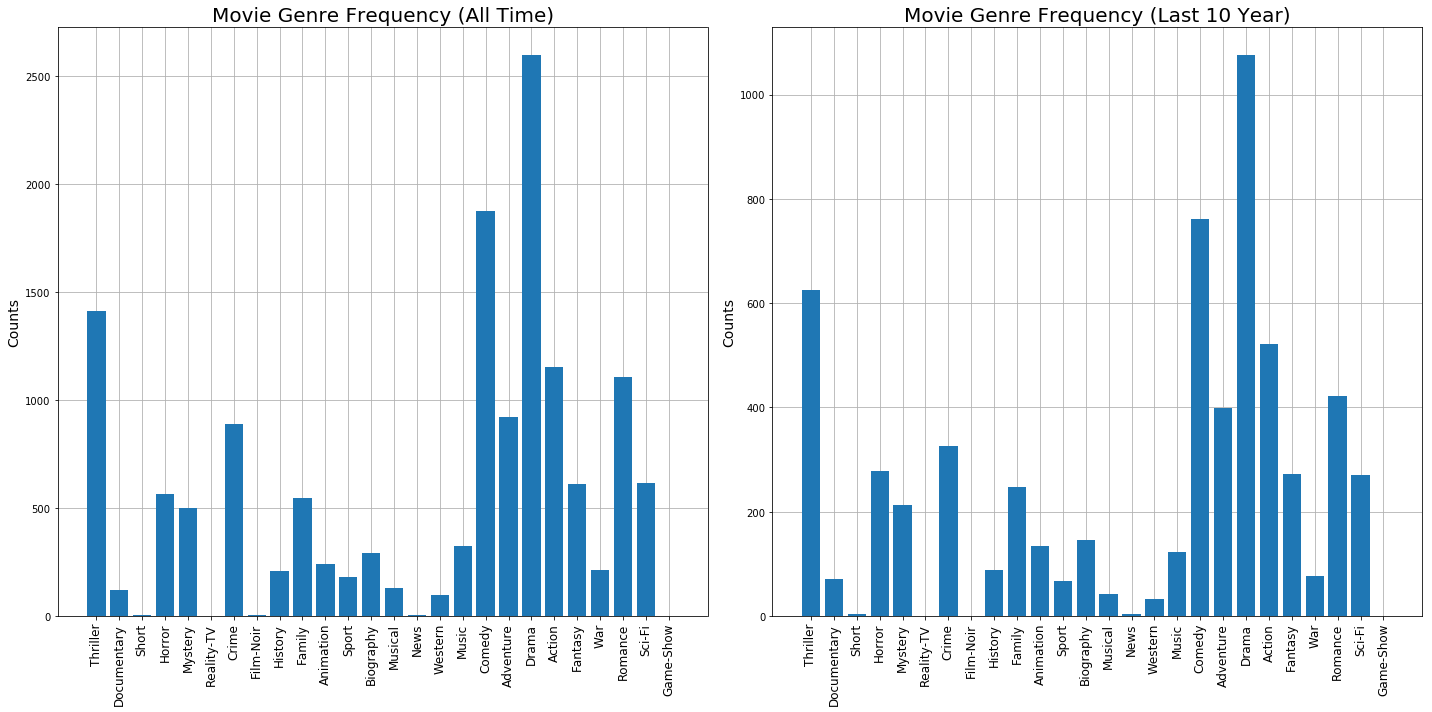

In [698]:
plt.figure(figsize=(20,10))

plt.subplot(1, 2, 1)
plt.bar(x_pos, freq, align = 'center', zorder = 3)
plt.xticks(x_pos, objects, rotation = 90, fontsize = 12)
plt.ylabel('Counts', fontsize = 14)
plt.title('Movie Genre Frequency (All Time)', fontsize = 20)
plt.grid(zorder = 0)

plt.subplot(1, 2, 2)
plt.bar(x_pos, freq_10yr, align = 'center', zorder = 3)
plt.xticks(x_pos, objects, rotation = 90, fontsize = 12)
plt.ylabel('Counts', fontsize = 14)
plt.title('Movie Genre Frequency (Last 10 Year)', fontsize = 20)
plt.grid(zorder = 0)

plt.tight_layout()
plt.show()

From the Bar Chart above, we can seet that Drama is the most popular genre of movies. The the popularity of each genre stayed relatively the same. But looking closely, Action movies are slowly becoming more popular in the last 10 years as you can see the difference between Action and Romance are gradually growing.

Want to focus analysis on Action and Romance

In [699]:
# Locate all the movies with action in the genre excluding romance
act_df = dat_df.loc[lambda x: dat_df['Genre'].str.contains('Action')]
act_df = act_df[act_df['Genre'].str.contains('Romance') == False]
act_df = act_df.reset_index(drop = True)

In [700]:
# Locate all the movies with romance in the genre excluding action
rom_df = dat_df.loc[lambda x: dat_df['Genre'].str.contains('Romance')]
rom_df = rom_df[rom_df['Genre'].str.contains('Action') == False]
rom_df = rom_df.reset_index(drop = True)

In [701]:
# Group the action movies by years and count the numbers of action movies produced that year
num_act_df = act_df.groupby('Year').count()

# Group the romance movies by years and count the numbers of romance movies produced that year
num_rom_df = rom_df.groupby('Year').count()

In [702]:
# Create a Function to categorize the years into decades
def year_to_decade(var):
    decade = []
    ind = var
    counts = []
    for x in var.index:
        if x < 1970:
            counts.append(ind[x])
            x = 'x < 1970'
            decade.append(x)
        elif x < 1980 and x >= 1970:
            counts.append(ind[x])
            x = '1970 <= x < 1980'
            decade.append(x)
        elif x < 1990 and x >= 1980:
            counts.append(ind[x])
            x = '1980 <= x < 1990'
            decade.append(x)
        elif x < 2000 and x >= 1990:
            counts.append(ind[x])
            x = '1990 <= x < 2000'
            decade.append(x)
        elif x < 2010 and x >= 2000:
            counts.append(ind[x])
            x = '2000 <= x < 2010'
            decade.append(x)
        elif x >= 2010:
            counts.append(ind[x])
            x = '2010 <= x'
            decade.append(x)
    return pd.DataFrame(decade, counts).reset_index();

In [703]:
# Create a new data frame for action movies in decade
dec_act_df = year_to_decade(num_act_df['Movie'])
dec_act_df.columns = ['Movie', 'Decade']
dec_act_df = dec_act_df.groupby('Decade').mean()
dec_act_df = pd.concat([dec_act_df.iloc[5:], dec_act_df.iloc[0:4]])

# Create a new data frame for action movies in decade
dec_rom_df = year_to_decade(num_rom_df['Movie'])
dec_rom_df.columns = ['Movie', 'Decade']
dec_rom_df = dec_rom_df.groupby('Decade').mean()
dec_rom_df = pd.concat([dec_rom_df.iloc[5:], dec_rom_df.iloc[0:4]])


In [704]:
# Assign variable for line plot (action movies)
act_objects = dec_act_df['Movie'].index
act_count = dec_act_df['Movie']
act_x_pos = np.arange(len(act_objects))      
 
# Assign variable for line plot (romance movies)
rom_objects = dec_rom_df['Movie'].index
rom_count = dec_rom_df['Movie']
rom_x_pos = np.arange(len(rom_objects))

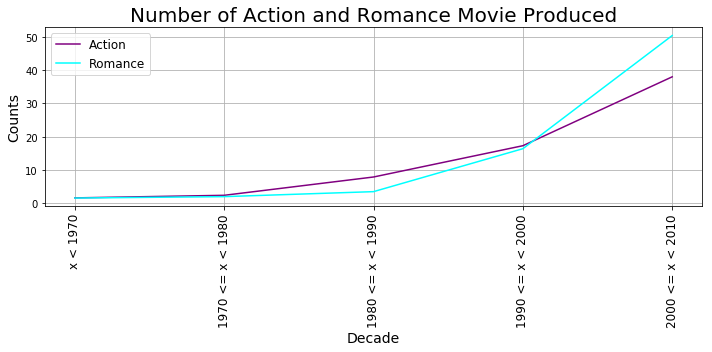

In [715]:
#Compare Action and Romance movies by the numbers produced over the decades
plt.figure(figsize=(10,5))
plt.plot(act_x_pos, act_count, color = 'purple', zorder = 3, label = 'Action')
plt.plot(rom_x_pos, rom_count, color = 'cyan', zorder =3, label = 'Romance')

# graphs
plt.xticks(act_x_pos, act_objects, rotation = 90, fontsize = 12)
plt.ylabel('Counts', fontsize = 14)
plt.xlabel('Decade', fontsize = 14)
plt.title('Number of Action and Romance Movie Produced', fontsize = 20)
plt.grid(zorder = 0)

# create a legend 
plt.legend(fontsize = 'large')


plt.tight_layout()
plt.show()

 # need to change grid for the graph below with profit

Want to compare the profit generated by the two genre overtime


In [430]:
profit_act_df = act_df[['Year', 'Budget', 'Gross']]

#len(profit_act_df.loc[:, 'Gross'])
profit = profit_act_df.loc[:, 'Gross'] - profit_act_df.loc[:, 'Budget']

profit_act_df['Profit'] = profit
profit_act_df[np.isnan(profit_act_df)] = 0


C:\Users\Mike\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Mike\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\Mike\Anaconda3\lib\site-packages\pandas\core\frame.py:2464: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._where(-key, value

In [413]:
profit_act_df = profit_act_df.groupby('Year').sum()
act_objects = profit_act_df['Profit'].index
act_count = profit_act_df['Profit']
act_x_pos = np.arange(len(act_objects))

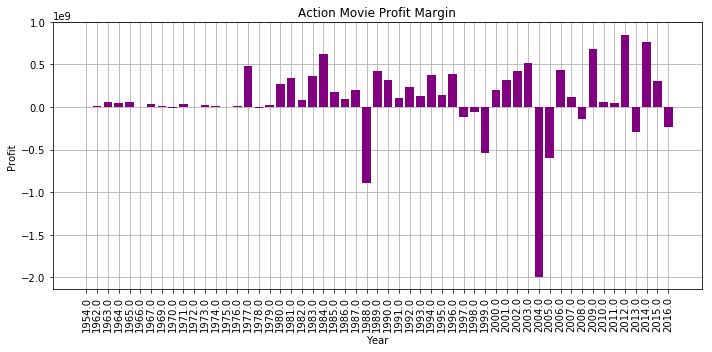

In [399]:
plt.figure(figsize=(10,5))
plt.bar(act_x_pos, act_count, color = 'purple', zorder = 3)
plt.xticks(act_x_pos, act_objects, rotation = 90)
plt.ylabel('Profit')
plt.xlabel('Year')
plt.title('Action Movie Profit Margin')
plt.grid(zorder = 0)


plt.tight_layout()
plt.show()

<Container object of 3 artists>

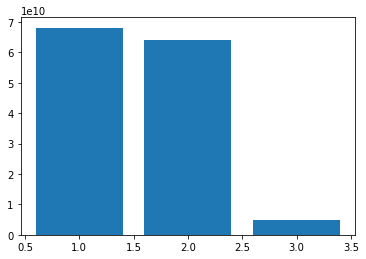

In [416]:
# total gross, budget, profit
x = sum(profit_act_df['Gross'])
y = sum(profit_act_df['Budget'])
z = sum(profit_act_df['Profit'])
act_rev = [x,y,z]

plt.bar([1,2,3] ,act_rev)